# Question from Feature Selection: standardize or normalize categorical variables for regularized regression??? But the categorical variables are neglected during tuning but is required in order to have a non-zero intercept...?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
ols = LinearRegression()
ridge = Ridge()
lasso  = Lasso()
elasticnet = ElasticNet()
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
baseline_df=pd.read_csv('baseline_df.csv',index_col='Id')
normalized_baseline_df=pd.read_csv('normalized_baseline_df.csv',index_col='Id')
standardized_baseline_df=pd.read_csv('standardized_baseline_df.csv',index_col='Id')
baseline_df.sample(10)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,MoSold,YrSold,SalePrice,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Street__Pave,Alley__No Alley,Alley__Pave,LotShape__IR2,LotShape__IR3,LotShape__Reg,LandContour__HLS,LandContour__Low,LandContour__Lvl,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,LandSlope__Mod,LandSlope__Sev,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,Condition2__Feedr,Condition2__Norm,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Unf,HouseStyle__1Story,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,RoofMatl__CompShg,RoofMatl__Membran,RoofMatl__Metal,RoofMatl__Roll,RoofMatl__Tar&Grv,RoofMatl__WdShake,RoofMatl__WdShngl,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stone,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__BrkFace,MasVnrType__No Masonry Veneer,MasVnrType__None,MasVnrType__Stone,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__No Basement,BsmtFinType1__Rec,BsmtFinType1__Unf,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,CentralAir__Y,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sev,Functional__Typ,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__No Garage,GarageFinish__No Garage,GarageFinish__RFn,GarageFinish__Unf,PavedDrive__P,PavedDrive__Y,Fence__GdWo,Fence__MnPrv,Fence__MnWw,Fence__No Fence,MiscFeature__Shed,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,WoodDeckSF__1,OpenPorchSF__1,EnclosedPorch__1,3SsnPorch__1,ScreenPorch__1,PoolArea__1
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [2]:
nominal_var_processed=['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',\
             'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',\
             'Exterior1st','Exterior2nd','MasVnrType','Foundation',\
             'BsmtFinType1','Heating','CentralAir',\
             'Electrical','Functional','GarageType','GarageFinish',\
             'PavedDrive','Fence','MiscFeature','SaleType','SaleCondition','MSSubClass',\
             'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']
ordinal_var_processed=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath',\
             'HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',\
             'MoSold','YrSold','HeatingQC','KitchenQual','ExterQual','ExterCond','BsmtQual',\
             'BsmtCond','BsmtExposure','FireplaceQu','GarageQual','GarageCond']
cont_var_processed=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF',\
          '1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea']
cont_var_for_tuning=ordinal_var_processed+cont_var_processed

x=baseline_df.drop('SalePrice',axis='columns')
y=baseline_df.SalePrice
standardized_x=standardized_baseline_df.drop('SalePrice',axis='columns')
standardized_y=standardized_baseline_df.SalePrice
normalized_x=normalized_baseline_df.drop('SalePrice',axis='columns')
normalized_y=normalized_baseline_df.SalePrice

In [3]:
# Train Test Split (ALL FEATURES)
# standardized_x_train, standardized_x_test, standardized_y_train, standardized_y_test = train_test_split(standardized_x, standardized_y, test_size=0.3, random_state=0)
# normalized_x_train, normalized_x_test, normalized_y_train, normalized_y_test = train_test_split(normalized_x, normalized_y, test_size=0.3, random_state=0)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Train Test Split (ONLY CONT. AND ORDINAL)
standardized_x_train, standardized_x_test, standardized_y_train, standardized_y_test = train_test_split(standardized_x[cont_var_for_tuning], standardized_y, test_size=0.3, random_state=0)
normalized_x_train, normalized_x_test, normalized_y_train, normalized_y_test = train_test_split(normalized_x[cont_var_for_tuning], normalized_y, test_size=0.3, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x[cont_var_for_tuning], y, test_size=0.3, random_state=0)

In [4]:
#################################################################################
#################################################################################
####### Deciding whether to use scaled features or not HERE!!!!! ################
#################################################################################
#################################################################################

x_train, x_test, y_train, y_test = standardized_x_train, standardized_x_test, standardized_y_train, standardized_y_test

#################################################################################
#################################################################################

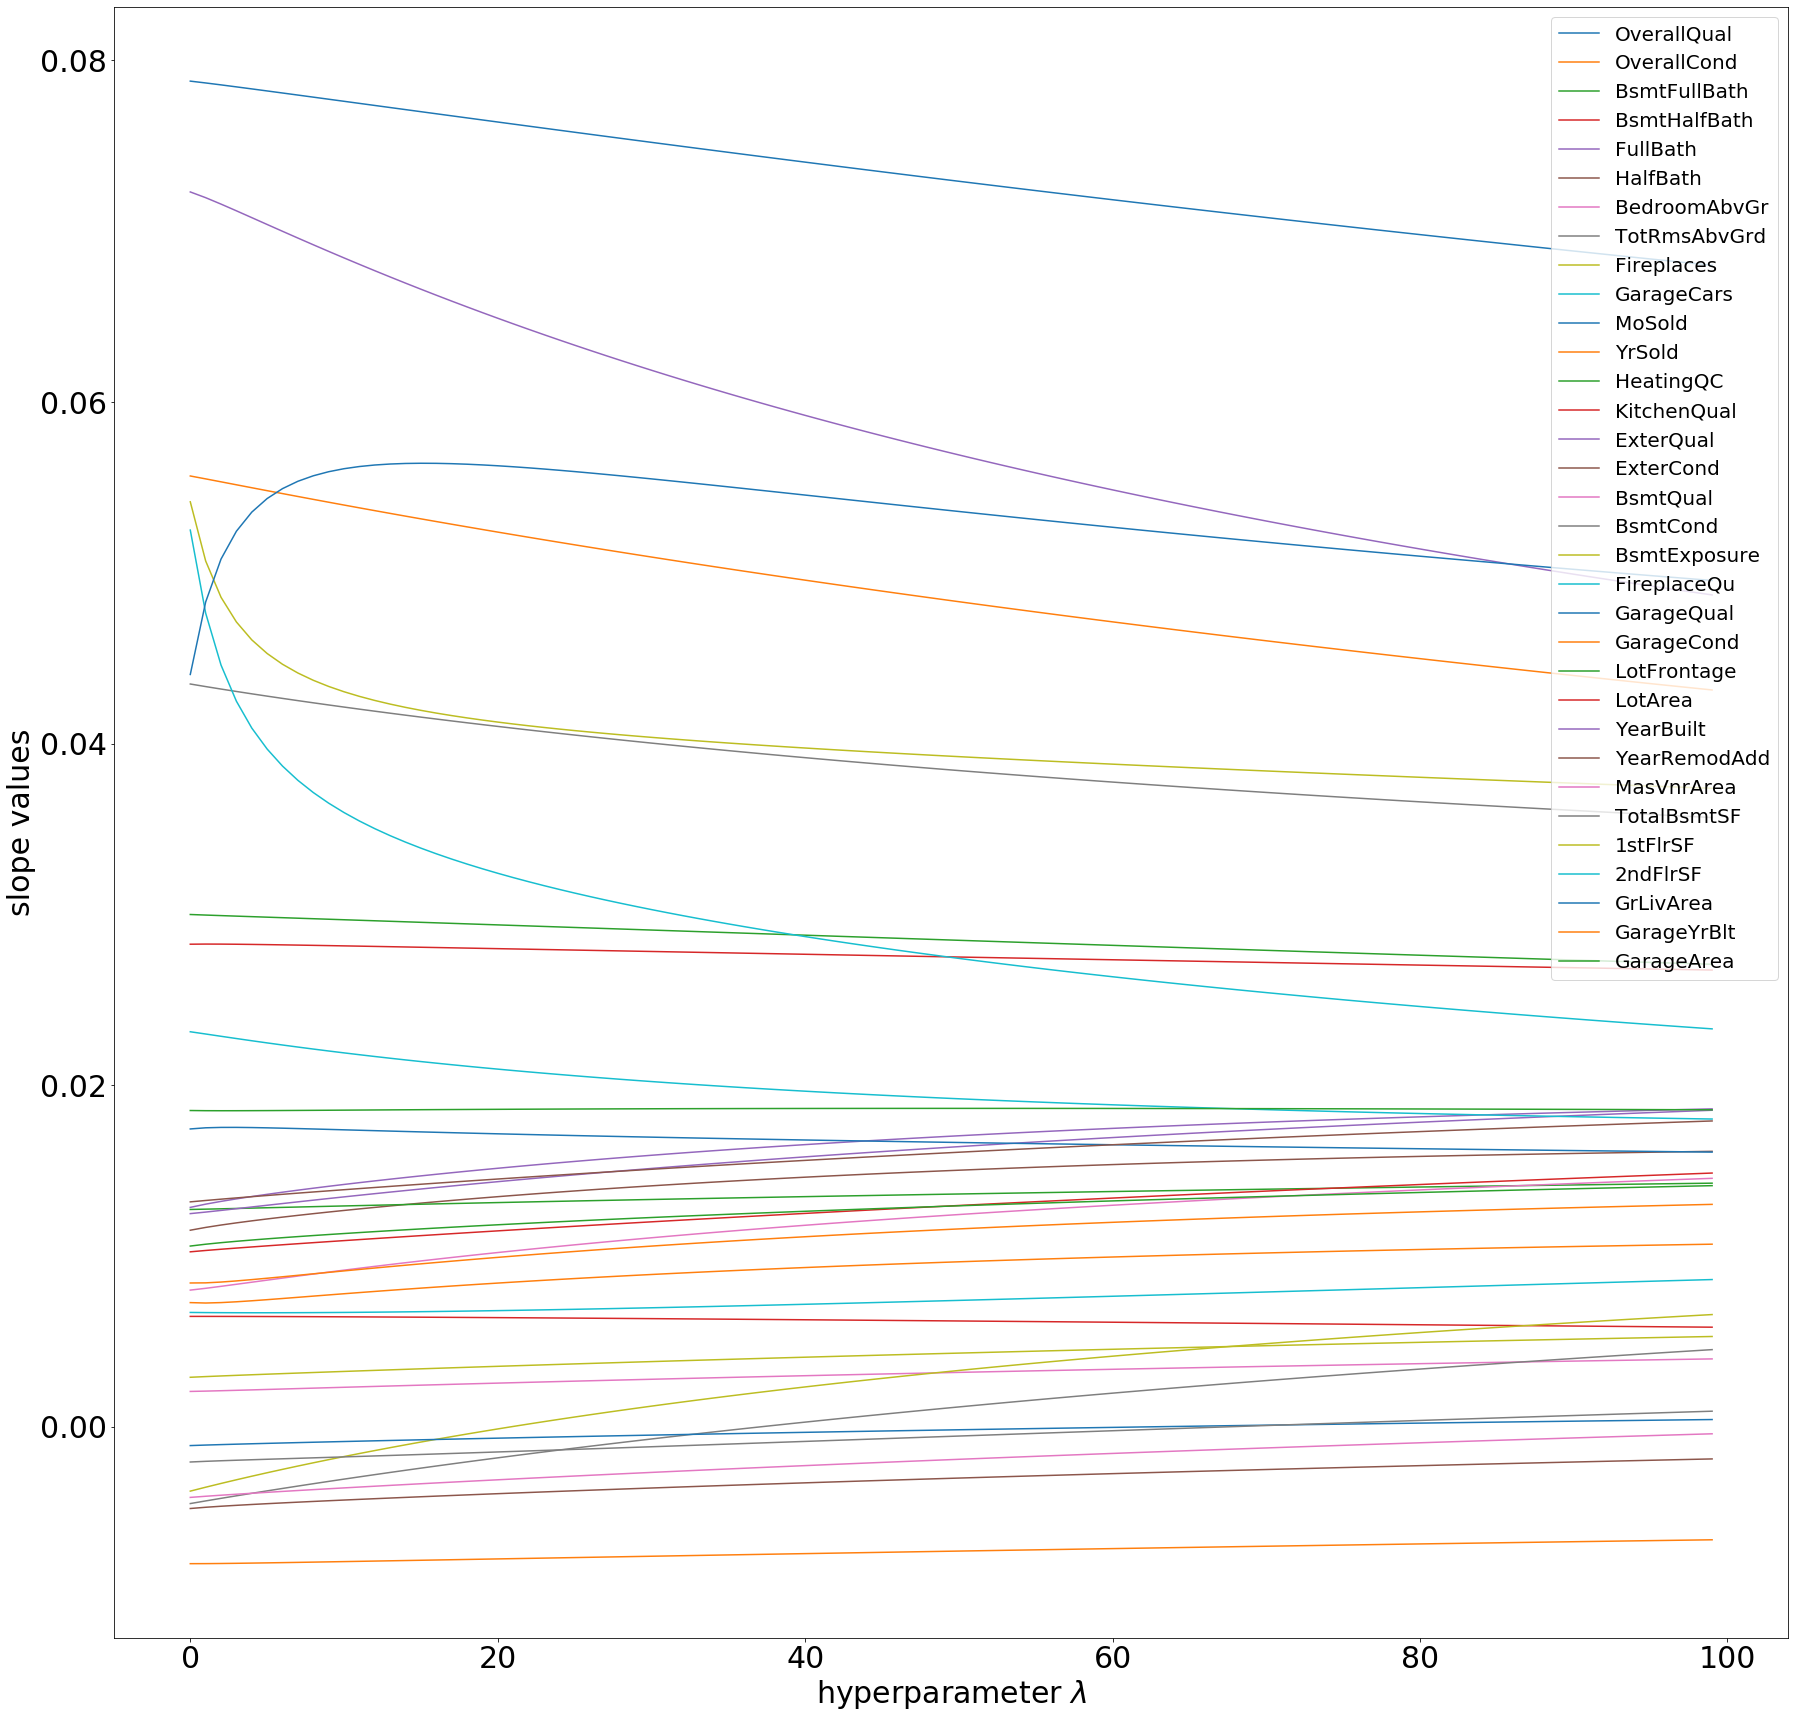

In [5]:
# Manual Grid Search for Ridge
alphas = np.arange(0,100,1)
ridge.set_params(normalize=False)
coefs  = []
scores = []
test_scores = []
for alpha in alphas:
        ridge.set_params(alpha=alpha,fit_intercept=True)
        ridge.fit(x_train,y_train)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(x_train,y_train))
        test_scores.append(ridge.score(x_test,y_test))
coefs = pd.DataFrame(coefs, index = alphas, columns = x_train.columns)  
# Plotting the slopes for different lambda (FOR CONTINUOUS AND ORDINAL VARIABLES ONLY):
plt.figure(figsize=(30,30))
# cont_coefs=coefs[cont_var_for_tuning]
for name in coefs.columns:
    plt.plot(list(coefs.index),coefs[name],label=name)
plt.legend(loc=1,fontsize=20)   
plt.xlabel(r'hyperparameter $\lambda$',size=30)
plt.ylabel(r'slope values',size=30)
plt.yticks(size=30);
plt.xticks(size=30);
# plt.ylim(-0.2,0.2)
# plt.xlim(0,1)

Text(0, 0.5, '$R^2$')

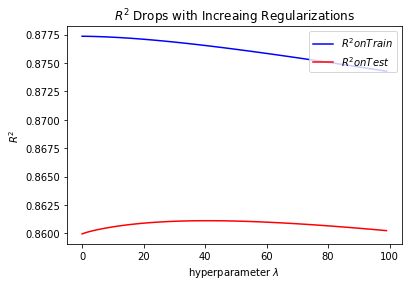

In [6]:
# Plotting the R^2 for different lambda for Ridge: 
plt.figure
plt.plot(alphas, scores, c='b', label=r'$R^2 on Train$')
plt.plot(alphas, test_scores, c='r', label=r'$R^2 on Test$')
plt.legend(loc=1)
plt.title(r'$R^2$ Drops with Increaing Regularizations')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

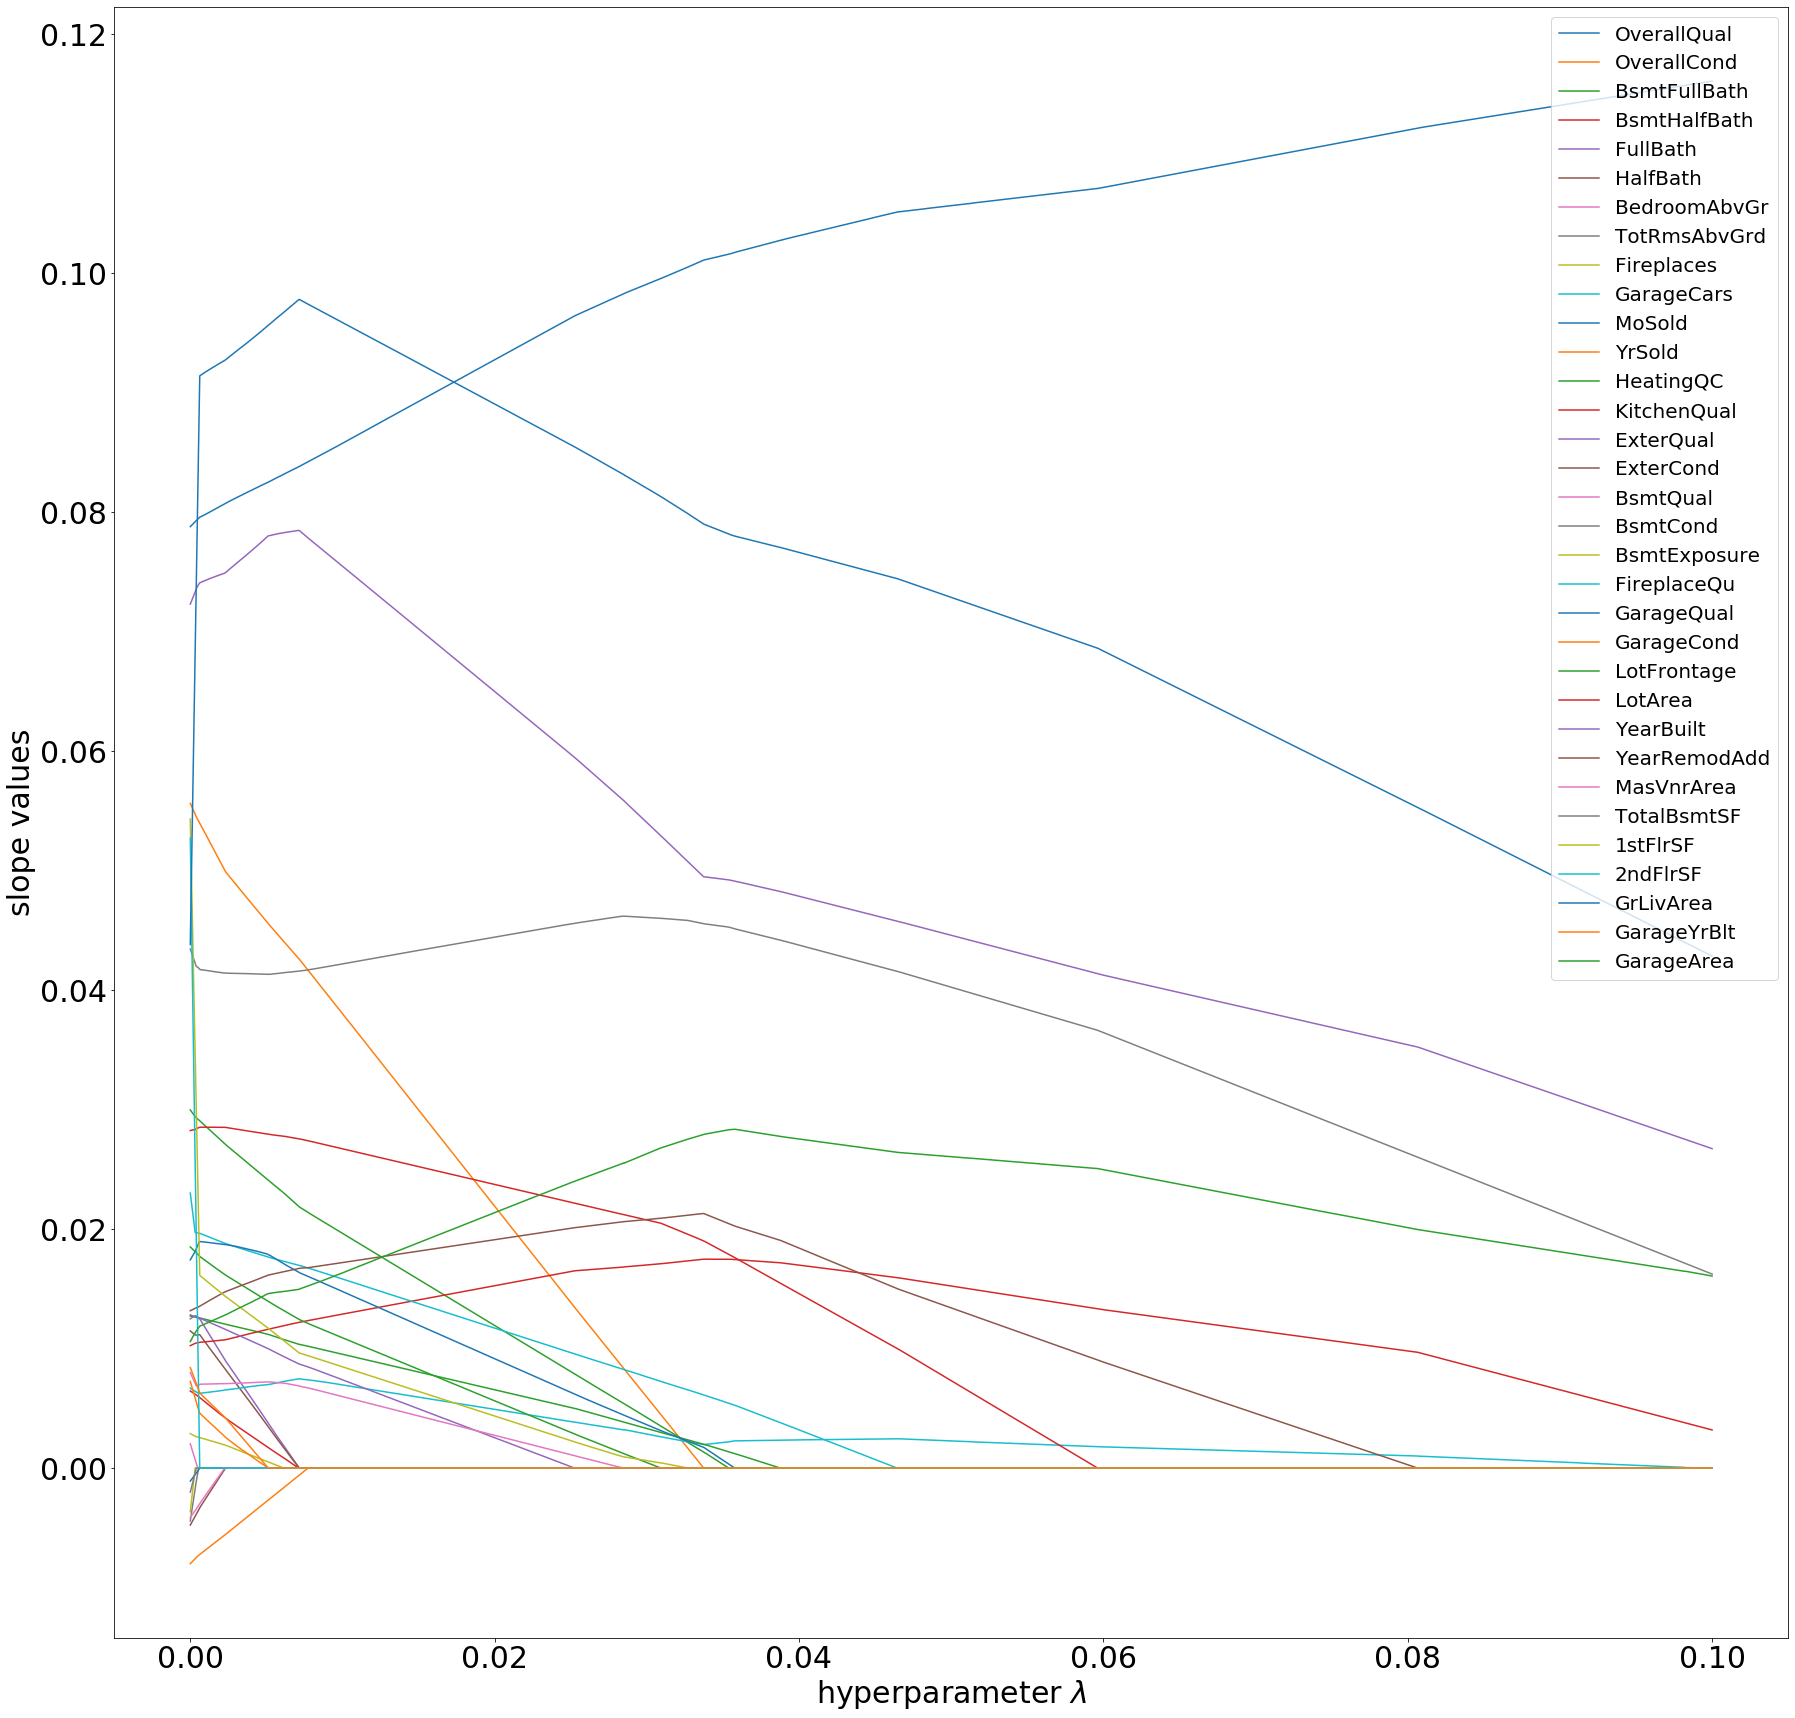

In [7]:
# Manual Grid Search for Lasso
alphas = np.arange(0.00001,0.1,0.00001)
lasso.set_params(normalize=False)
coefs  = []
scores = []
test_scores = []
for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(x_train,y_train)  
        coefs.append(lasso.coef_)
        scores.append(lasso.score(x_train,y_train))
        test_scores.append(lasso.score(x_test,y_test))
coefs = pd.DataFrame(coefs, index = alphas, columns = x_train.columns)  
# Plotting the slopes for different lambda:
plt.figure(figsize=(30,30))
for name in coefs.columns:
    plt.plot(list(coefs.index),coefs[name],label=name)
plt.legend(loc=1,fontsize=20)   
plt.xlabel(r'hyperparameter $\lambda$',size=30)
plt.ylabel(r'slope values',size=30)
plt.yticks(size=30);
plt.xticks(size=30);  
# use 0.025 as cutoff for feature selection

Text(0, 0.5, '$R^2$')

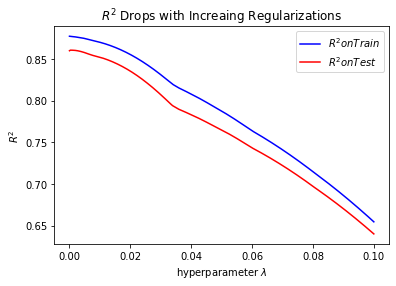

In [8]:
# Plotting the R^2 for different lambda for Lasso: 
plt.figure
plt.plot(alphas, scores, c='b', label=r'$R^2 on Train$')
plt.plot(alphas, test_scores, c='r', label=r'$R^2 on Test$')
plt.legend(loc=1)
plt.title(r'$R^2$ Drops with Increaing Regularizations')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [9]:
# TAKES A WHILE TO RUN!!!
# Manual Grid Search for Elastic Net
N_alpha = 500
N_rho   = 50
alphaRange = np.linspace(0.001, 1.5, N_alpha)
rhoRange   = np.linspace(0.001,1, N_rho) # we avoid very small rho by starting at 0.1
scores     = np.zeros((N_alpha, N_rho))
trainR2    = np.zeros((N_alpha, N_rho))
testR2     = np.zeros((N_alpha, N_rho))
intercepts = np.zeros((N_alpha, N_rho))
coefs      = np.zeros((N_alpha, N_rho, x_train.shape[1]))
for alphaIdx, alpha in enumerate(alphaRange):
    print(alphaIdx,'/',N_alpha,end='\r')
    for rhoIdx, rho in enumerate(rhoRange):
            elasticnet.set_params(alpha=alpha, l1_ratio=rho)
            elasticnet.fit(x_train,y_train)
            trainR2[alphaIdx,rhoIdx] = elasticnet.score(x_train,y_train)  
            testR2[alphaIdx,rhoIdx] = elasticnet.score(x_test,y_test)   
            intercepts[alphaIdx, rhoIdx] = elasticnet.intercept_
            coefs[alphaIdx, rhoIdx, :] = elasticnet.coef_
trainR2_scores=np.array(trainR2)
testR2_scores=np.array(testR2)
optimal_train_index=np.where(trainR2_scores == np.max(trainR2_scores))
optimal_test_index=np.where(testR2_scores == np.max(testR2_scores))

optimal_train_alpha=alphaRange[optimal_train_index[0]]
optimal_train_rho=rhoRange[optimal_train_index[1]]
optimal_test_alpha=alphaRange[optimal_test_index[0]]
optimal_test_rho=rhoRange[optimal_test_index[1]]

In [10]:
print('Optimal Alpha/lambda for train dataset: ',optimal_train_alpha)
print('Optimal l1 ratio for train dataset: ',optimal_train_rho)
print('Optimal Alpha/lambda for test dataset: ',optimal_test_alpha)
print('Optimal l1 ratio for test dataset: ',optimal_test_rho)
print('Highest Score for train dataset: ',trainR2_scores[optimal_train_index])
print('Highest Score for test dataset: ',testR2_scores[optimal_test_index])


Optimal Alpha/lambda for train dataset:  [0.001]
Optimal l1 ratio for train dataset:  [0.001]
Optimal Alpha/lambda for test dataset:  [0.04606012]
Optimal l1 ratio for test dataset:  [0.001]
Highest Score for train dataset:  [0.8773556]
Highest Score for test dataset:  [0.86110366]


Text(0, 0.5, 'Alpha = Lambda')

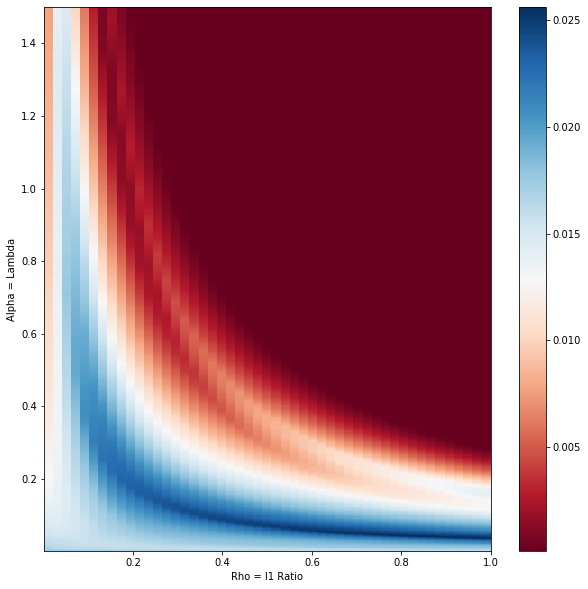

In [15]:
# Visualizing the elastic net R^2_train_score-R^2_test_score
# minimum is best value for alph and rho

fig = plt.figure(figsize=(10,10))
x = rhoRange  # alpha was originally in rows. see pcolor documentation
y = alphaRange   # alpha was originally in rows. see pcolor documentation
X, Y = np.meshgrid(x, y) # alpha was originally in rows. see pcolor documentation
Z = trainR2_scores-testR2_scores  # alpha was originally in rows. see pcolor documentation
# Z = np.flipud(np.fliplr((trainR2_scores-testR2_scores).T))# alpha was originally in rows. see pcolor documentation
plt.pcolor(X,Y,Z,cmap='RdBu')
plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.xlabel('Rho = l1 Ratio')
plt.ylabel('Alpha = Lambda')

In [12]:
# the minimum
min_ind=np.unravel_index(np.argmin(np.abs(Z)), Z.shape)
print('Best Rho: ', rhoRange[min_ind[1]])
print('Best Alpha: ', alphaRange[min_ind[0]])

Best Rho:  1.0
Best Alpha:  0.27736873747494994


In [13]:
## Elastic Net suggests that Lasso is simply the way to go! 
## But still need to figure out, how to properly treat categorical variables! 
## Do we include them in the reguarlized regression? Does it matter whether we include them or not?
## Currently, including categorical variables messes the regression (it seems). Need to understand why.

(500, 50)

In [14]:
Z.shape

(500, 50)